<p><strong class="ql-size-huge">Домашнє завдання 3</strong></p>
<ul><li>напишіть функцію гіпотези лінійної регресії у векторному вигляді;</li></ul>

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<li>напишіть функцію гіпотези лінійної регресії у векторному вигляді;</li>

In [150]:
def hypothesis(W: np.array, X: np.array):
    """
    Функція гіпотези лінійної регресії.

    Параметри:
    W: Вектор параметрів моделі.
    X: Матриця ознак.

    Повертає:
    numpy.array: Прогнозовані значення цільової змінної.
    """
    return np.dot(X, W)

<li>створіть функцію для обчислення функції втрат у векторному вигляді;</li>

In [151]:
def compute_cost(X: np.array, y: np.array, W: np.array):
    """
    Обчислює функцію втрат (функцію помилки) за формулою середньоквадратичної помилки.

    Параметри:
    X: Матриця ознак.
    y: Вектор цільової змінної.
    W: Вектор параметрів моделі.

    Повертає:
    Значення функції втрат.
    """
    n = len(y)
    predictions = hypothesis(W, X)
    squared_errors = np.square(predictions - y)
    cost = np.sum(squared_errors) / (2 * n)
    return cost

<li>реалізуйте один крок градієнтного спуску;</li>

In [152]:
def gradient_descent_step(X, y, W, learning_rate=0.01):
    """
    Виконання одного кроку градієнтного спуску для лінійної регресії.

    Параметри:
    X (numpy.array): Матриця ознак.
    y (numpy.array): Вектор цільової змінної.
    W (numpy.array): Вектор параметрів моделі.
    learning_rate (float): Крок навчання (learning rate).

    Повертає:
    numpy.array: Оновлені значення параметрів W.
    """
    n = len(y)
    predictions = hypothesis(W, X)
    errors = predictions - y
    gradient = np.dot(X.T, errors) / n
    W = W - learning_rate * gradient
    return W

<li>знайдіть найкращі параметри для&nbsp;<a href="https://drive.google.com/file/d/1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo/view?usp=share_link" rel="noopener noreferrer" target="_blank" style="color: var(--ifm-link-color);">датасету</a>&nbsp;прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;</li>

In [153]:
df = pd.read_csv('Housing.csv')
X = df[['area', 'bathrooms', 'bedrooms']].values
y = df['price'].values.reshape(-1, 1)
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)
X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

Оптимальні параметри:
[[4766523.46205873]
 [ 821199.26709864]
 [ 695515.99623791]
 [ 300296.28560637]]


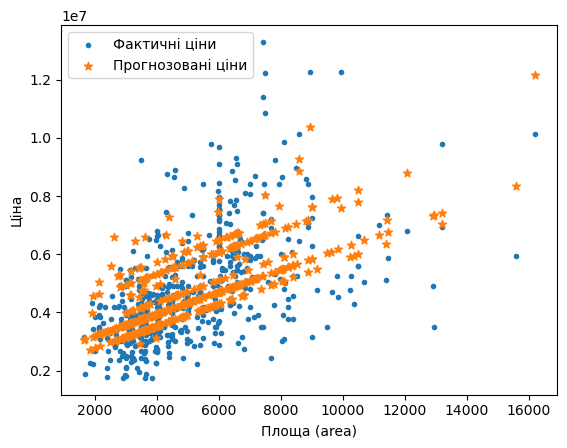

In [154]:
W_initial = np.zeros((X_normalized.shape[1], 1))

learning_rate = 0.01
num_iterations = 1000

W_optimal = W_initial
for _ in range(num_iterations):
    W_optimal = gradient_descent_step(X_normalized, y, W_optimal, learning_rate)

print("Оптимальні параметри:")
print(W_optimal)

predictions = hypothesis(W_optimal, X_normalized)

plt.scatter(df['area'], df['price'], label='Фактичні ціни', marker='.')
plt.scatter(df['area'], predictions, label='Прогнозовані ціни', marker='*')
plt.xlabel('Площа (area)')
plt.ylabel('Ціна')
plt.legend()
plt.show()

<li>знайдіть ці ж параметри за допомогою аналітичного рішення;</li>

Оптимальні параметри (аналітичне рішення):
[[4766729.24770642]
 [ 821214.14349519]
 [ 695808.52272538]
 [ 299983.57107963]]


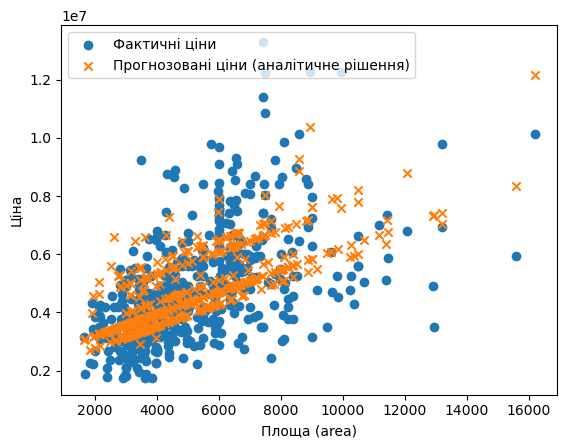

In [155]:
W_optimal_analytical = np.linalg.inv(X_normalized.T @ X_normalized) @ X_normalized.T @ Y

print("Оптимальні параметри (аналітичне рішення):")
print(W_optimal_analytical)

predictions_analytical = np.dot(X_normalized, W_optimal_analytical)

plt.scatter(df['area'], df['price'], label='Фактичні ціни')
plt.scatter(df['area'], predictions_analytical, label='Прогнозовані ціни (аналітичне рішення)', marker='x')
plt.xlabel('Площа (area)')
plt.ylabel('Ціна')
plt.legend()
plt.show()

<li>порівняйте отримані результати.</li>

Оптимальні параметри (градієнтний спуск) з параметрами
 learning_rate = 0.01 та num_iterations = 1000:
[[4766523.46205873]
 [ 821199.26709864]
 [ 695515.99623791]
 [ 300296.28560637]]

Оптимальні параметри, отримані за допомогою аналітичного рішення:
[[4766729.24770642]
 [ 821214.14349519]
 [ 695808.52272538]
 [ 299983.57107963]]


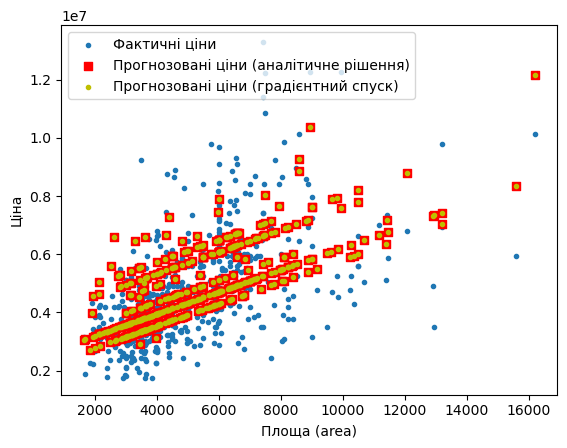

In [156]:
print(f"Оптимальні параметри (градієнтний спуск) з параметрами\n learning_rate = {learning_rate} та num_iterations = {num_iterations}:")
print(W_optimal)
print("\nОптимальні параметри, отримані за допомогою аналітичного рішення:")
print(W_optimal_analytical)

predictions_gradient_descent = hypothesis(W_optimal, X_normalized)

plt.scatter(df['area'], df['price'], label='Фактичні ціни', marker='.')
plt.scatter(df['area'], predictions_analytical, label='Прогнозовані ціни (аналітичне рішення)', marker=',', color='r')
plt.scatter(df['area'], predictions_gradient_descent, label='Прогнозовані ціни (градієнтний спуск)', marker='.', color='y')
plt.xlabel('Площа (area)')
plt.ylabel('Ціна')
plt.legend()
plt.show()
